Целью BRFSS является сбор единообразных, специфичных для штата данных о профилактической медицинской практике и рискованном
поведении, которые связаны с хроническими заболеваниями, травмами и предотвратимыми инфекционными заболеваниями у взрослого населения.
Факторы, оцениваемые BRFSS, включают употребление табака, охват медицинским обслуживанием, знания или профилактику ВИЧ/СПИДа,
физическую активность и потребление фруктов и овощей. Данные собираются из случайной выборки взрослых (по одному на
домохозяйство) с помощью телефонного опроса.

Система наблюдения за поведенческими факторами риска (BRFSS) является ведущей в стране системой телефонных опросов, связанных со здоровьем, которые собирают государственные данные о жителях США относительно их рискованного поведения, связанного со здоровьем, хронических заболеваний и использования профилактических услуг. Основанная в 1984 году с 15 штатами, BRFSS в настоящее время собирает данные во всех 50 штатах, а также в округе Колумбия и трех территориях США. BRFSS ежегодно проводит более 400 000 интервью со взрослыми, что делает его крупнейшей непрерывно проводимой системой обследований здоровья в мире.

О наборе данных
Контекст
Болезни сердца являются одними из наиболее распространенных хронических заболеваний в Соединенных Штатах, ежегодно затрагивая миллионы американцев и оказывая значительное финансовое бремя на экономику. Только в Соединенных Штатах болезни сердца уносят примерно 647 000 жизней каждый год, что делает их основной причиной смерти. Накопление бляшек внутри более крупных коронарных артерий, молекулярные изменения, связанные со старением, хроническим воспалением, высоким кровяным давлением и диабетом являются причинами и факторами риска сердечных заболеваний.

Хотя существуют различные типы ишемической болезни сердца, большинство людей узнают, что у них есть болезнь, только после таких симптомов, как боль в груди, сердечный приступ или внезапная остановка сердца. Этот факт подчеркивает важность профилактических мер и тестов, которые могут точно предсказать сердечные заболевания в популяции до негативных исходов, таких как инфаркты миокарда (сердечные приступы).

Центры по контролю и профилактике заболеваний определили высокое кровяное давление, высокий уровень холестерина в крови и курение в качестве трех ключевых факторов риска сердечных заболеваний. Примерно половина американцев имеют по крайней мере один из этих трех факторов риска. Национальный институт сердца, легких и крови выделяет более широкий спектр факторов, таких как возраст, окружающая среда и профессия, семейная история и генетика, привычки образа жизни, другие медицинские условия, раса или этническая принадлежность и пол для клиницистов для использования в диагностике ишемической болезни сердца. Диагноз, как правило, определяется первоначальным обследованием этих общих факторов риска, за которым следует анализ крови и другие тесты.

Содержание
Система наблюдения за поведенческими факторами риска (BRFSS) - это телефонный опрос, связанный со здоровьем, который ежегодно собирается CDC. Каждый год в опросе собираются ответы более 400 000 американцев о рискованном поведении, связанном со здоровьем, хронических состояниях здоровья и использовании профилактических услуг. Он проводится ежегодно с 1984 года. Для этого проекта я загрузил csv набора данных, доступного на Kaggle за 2015 год. Этот исходный набор данных содержит ответы от 441 455 человек и имеет 330 функций. Эти функции представляют собой либо вопросы, непосредственно задаваемые участникам, либо рассчитанные переменные на основе индивидуальных ответов участников.

Этот набор данных содержит 253 680 ответов на опросы из очищенного BRFSS 2015, которые будут использоваться в основном для двоичной классификации сердечных заболеваний. Не то, чтобы в этом наборе данных существовал сильный классовый дисбаланс. 229 787 респондентов не имеют / не имели сердечных заболеваний, в то время как 23 893 имели сердечные заболевания.  

    СФОРМУЛИРУЕМ ЦЕЛЬ ПРОЕКТА
Построить и испытать модели для классификации и прогноза сердечных приступов.Определить самые важные признаки,которые влияют на предполагаемый исход наступления заболевания.    

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils.class_weight import compute_class_weight


!pip install scikit-plot
import scikitplot as skplt

!pip install xgboost
import xgboost as xgb

!pip install catboost
import catboost
from catboost import Pool,CatBoost
from catboost import CatBoostClassifier
from catboost.utils import eval_metric
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve
from catboost.utils import select_threshold
from catboost.utils import get_roc_curve
from catboost.utils import get_confusion_matrix
from catboost import MetricVisualizer
from sklearn.utils.class_weight import compute_class_weight
from catboost import cv

!pip install sweetviz
import sweetviz

!pip install interpret
import interpret
from interpret import glassbox, blackbox, greybox,show,perf
#from interpret import show
#from interpret import glassbox


In [2]:

data = pd.read_csv('C:/Users/анатолий/Documents/datasets/heart_disease_health_indicators_BRFSS2015.csv')
display(data.head(15).T)
print(data.shape)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
HighChol,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0,25.0,30.0,25.0,30.0,24.0,25.0,34.0,26.0,28.0,33.0
Smoker,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Diabetes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Fruits,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


(253680, 22)


Распределение меток классов
 0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


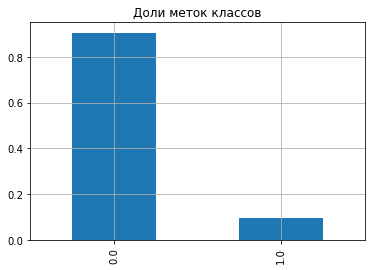

In [3]:
class_frequency = data['HeartDiseaseorAttack'].value_counts()
print('Распределение меток классов\n',class_frequency)
data['HeartDiseaseorAttack'].value_counts(normalize='true').plot(kind='bar',grid=True,title='Доли меток классов');

- 0- не имели заболеваний 229787 человек
- 1- имели сердечные заболевания 23893 человека

In [4]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Пропусков нет,тип данных у всех одинаковый

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [6]:
features = data.drop('HeartDiseaseorAttack',axis=1)
target= data['HeartDiseaseorAttack']
print(features.shape)
print(target.shape)

(253680, 21)
(253680,)


In [7]:
print("SweetViz Version : {}".format(sweetviz.__version__))

SweetViz Version : 2.1.4


                                             |                                             | [  0%]   00:00 ->…


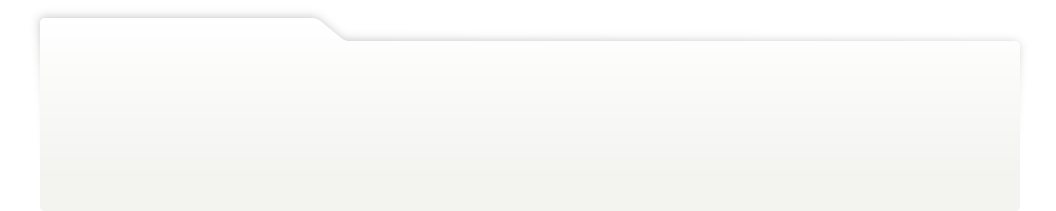
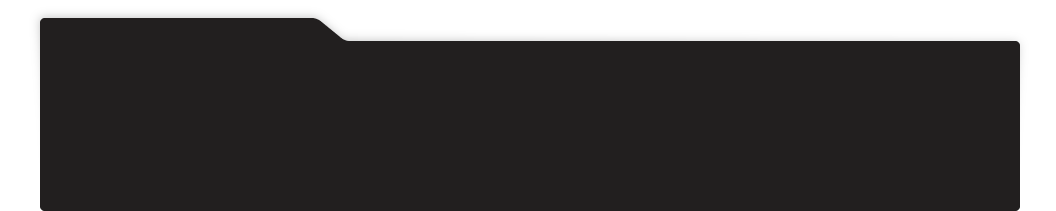
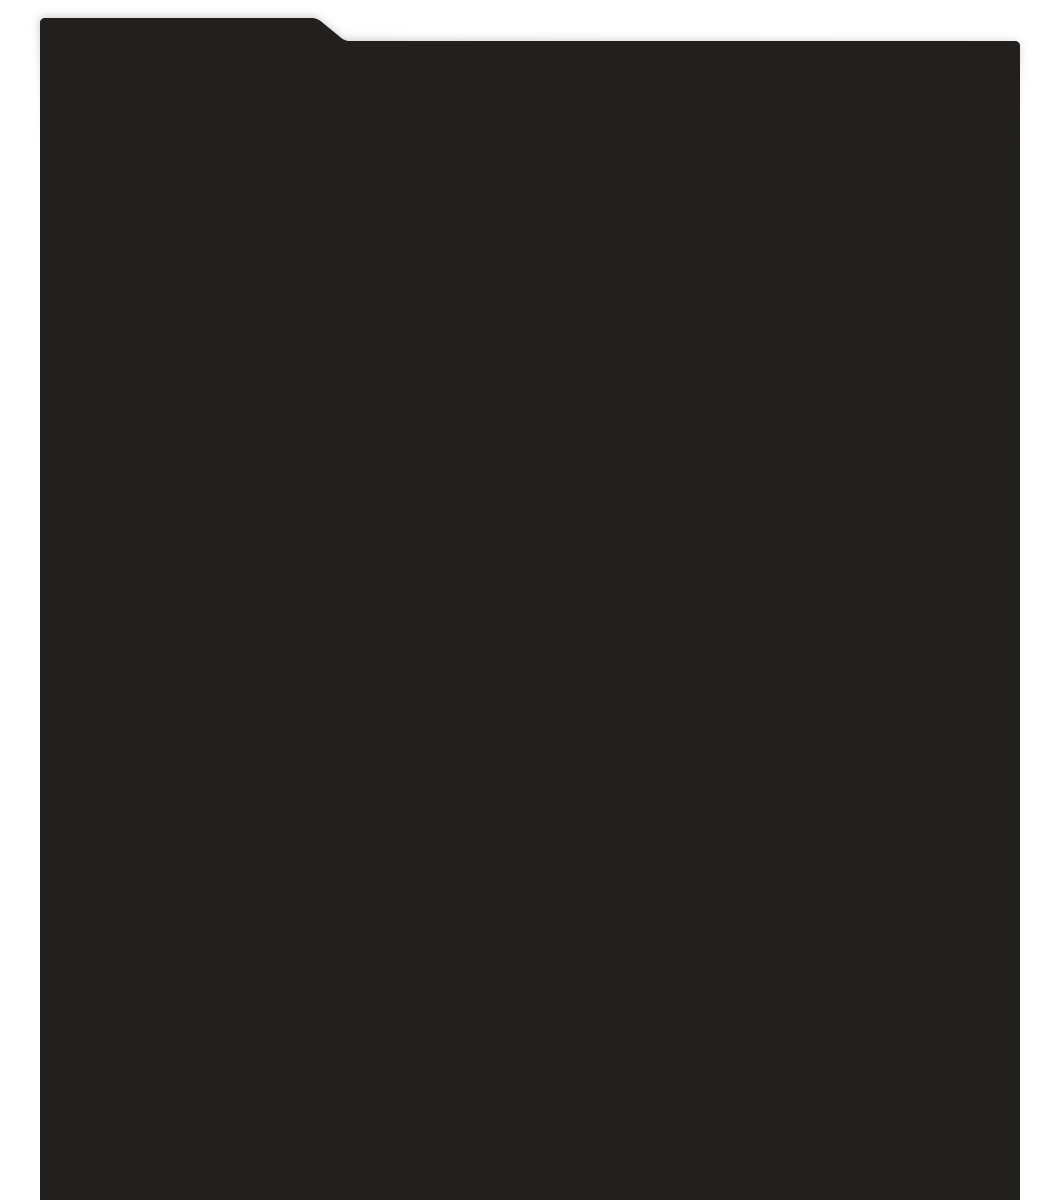
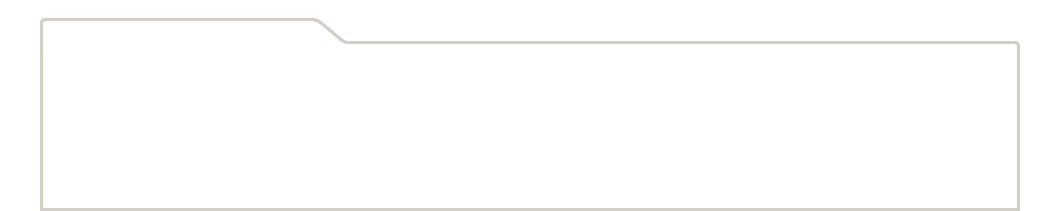
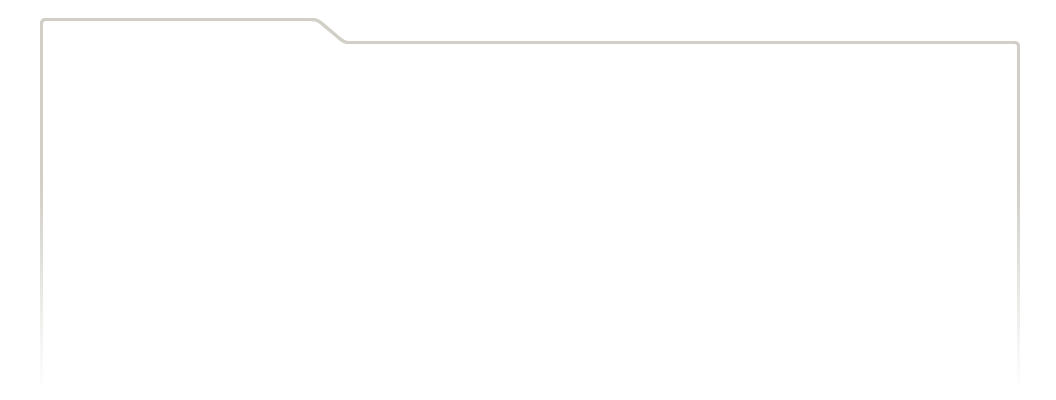
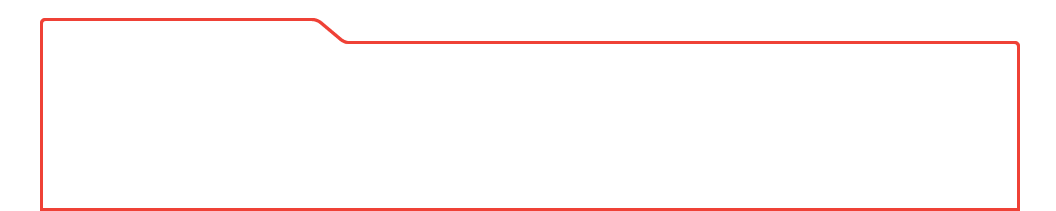
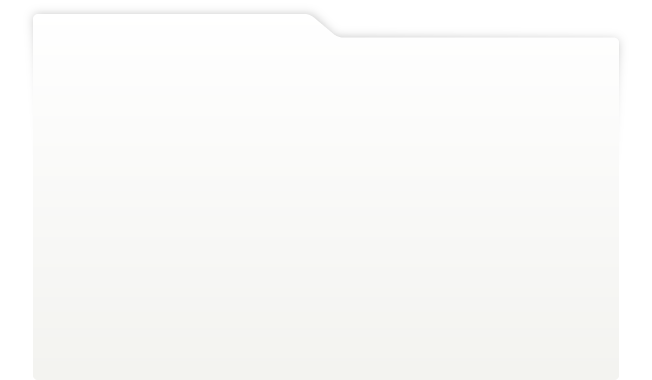
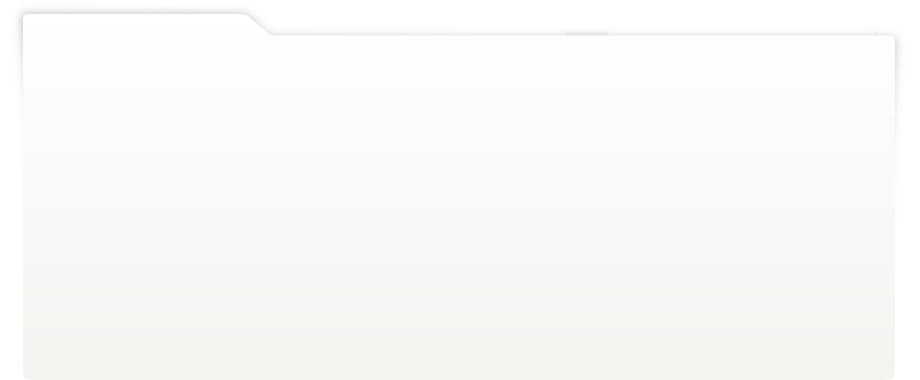
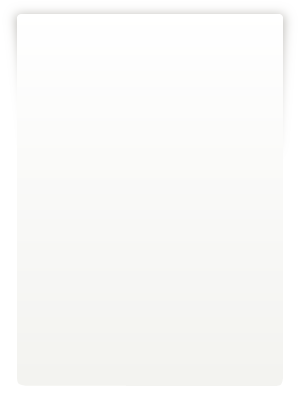
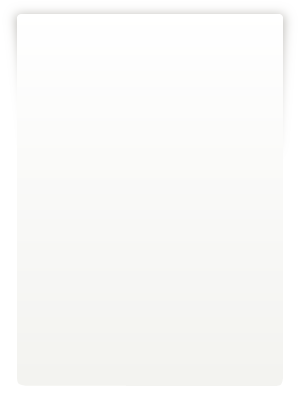
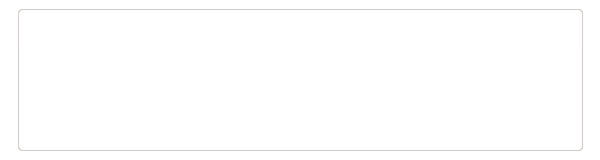
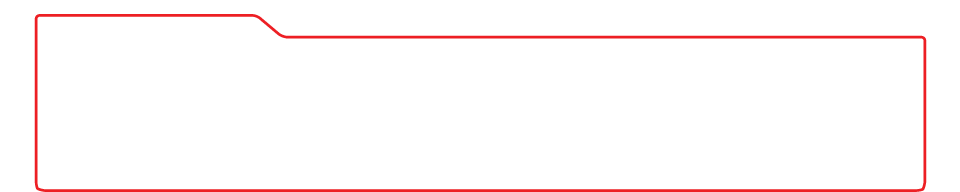
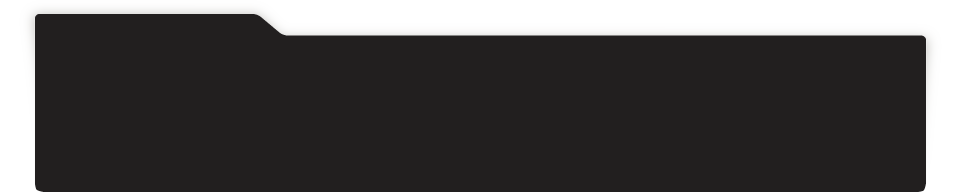
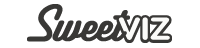
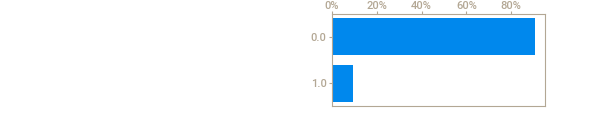
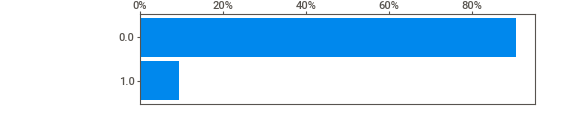
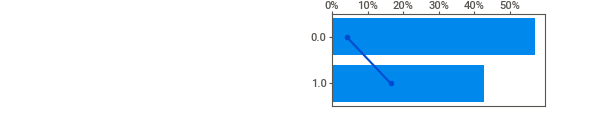
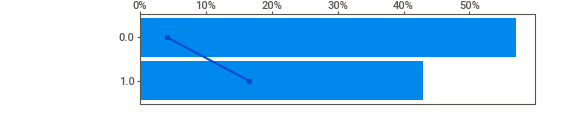
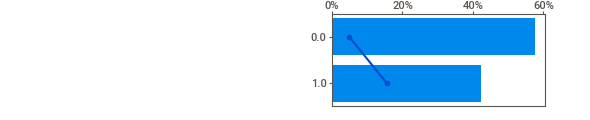
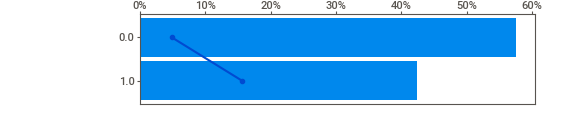
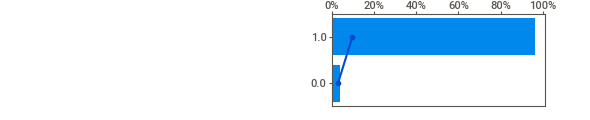
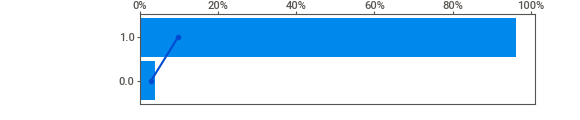
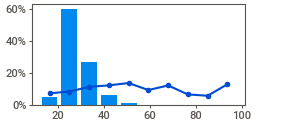
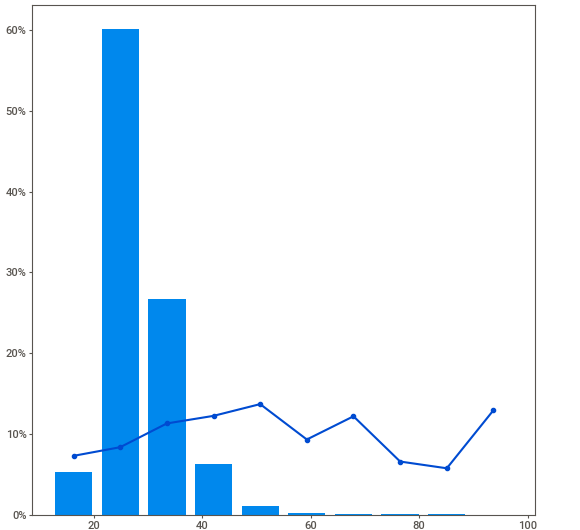
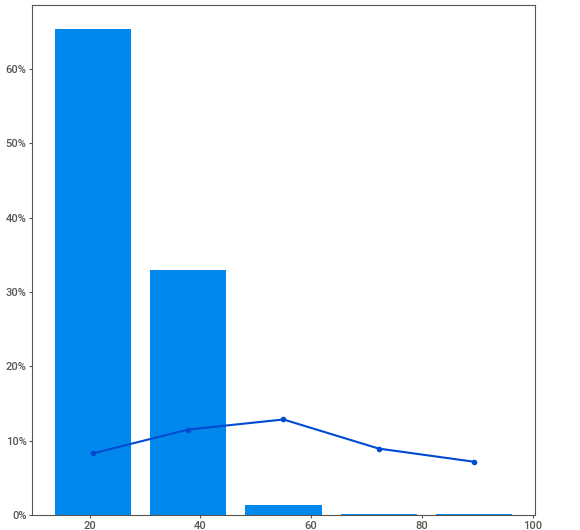
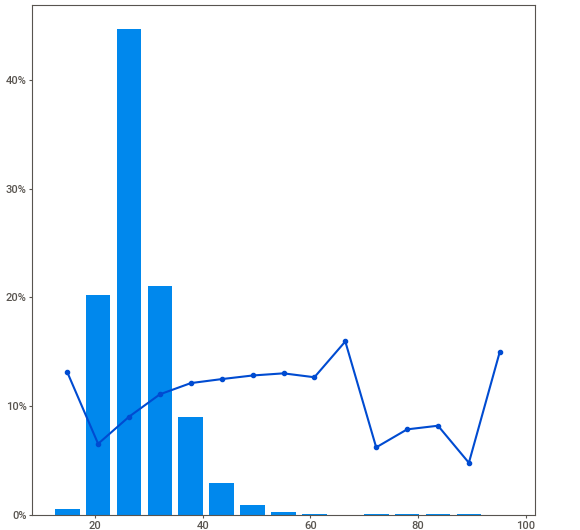
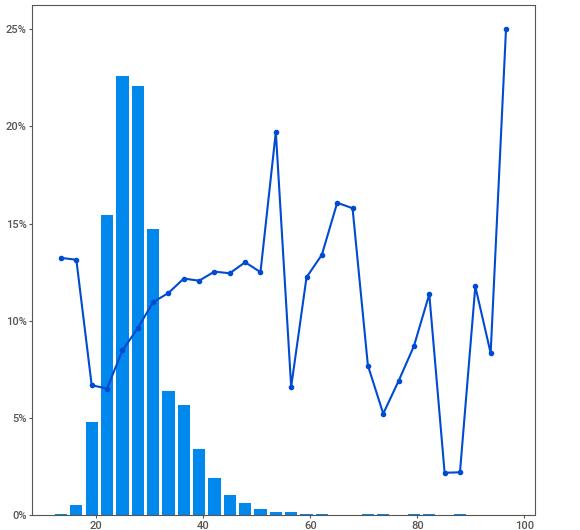
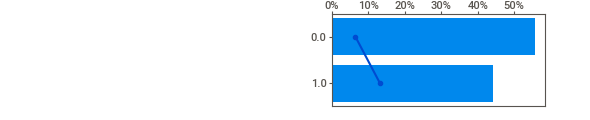
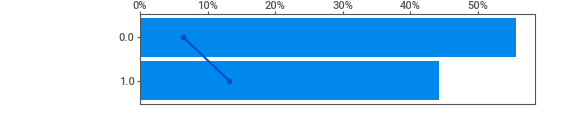
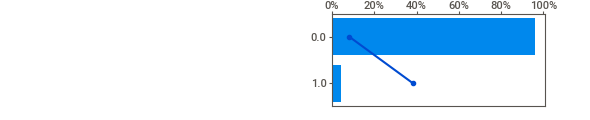
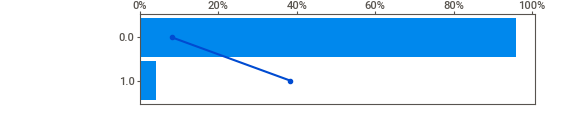
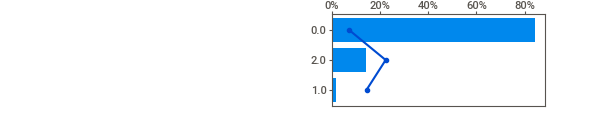
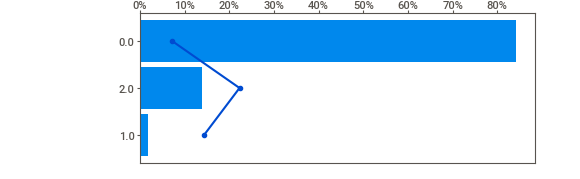
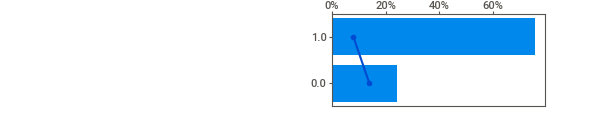
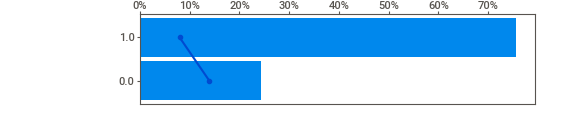
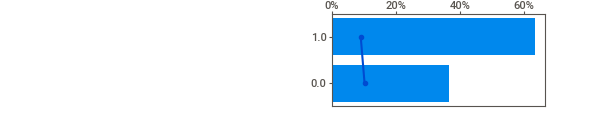
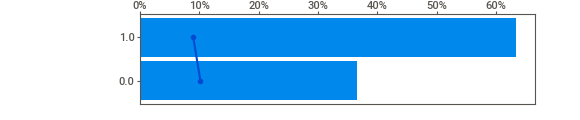
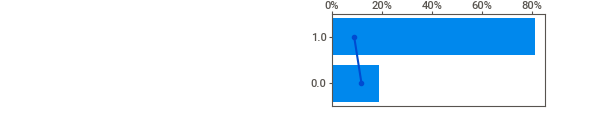
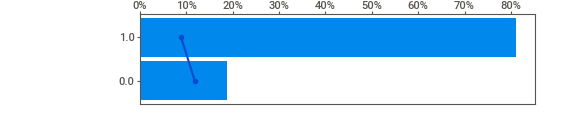
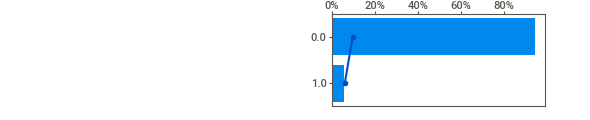
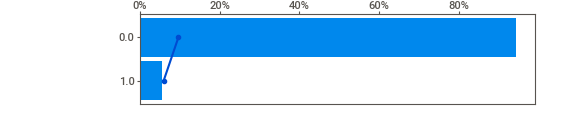
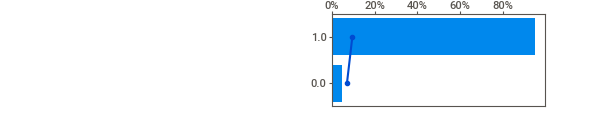
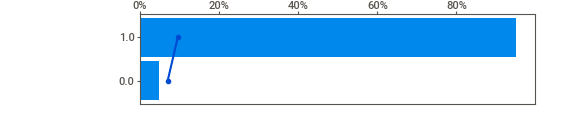
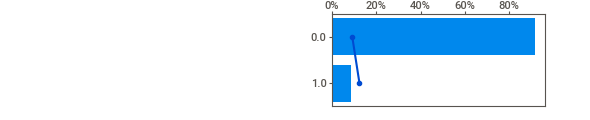
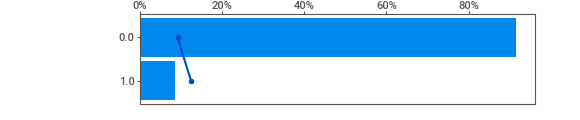
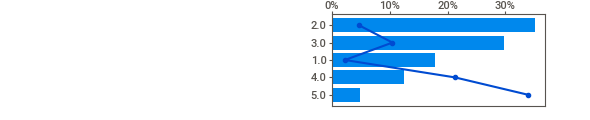
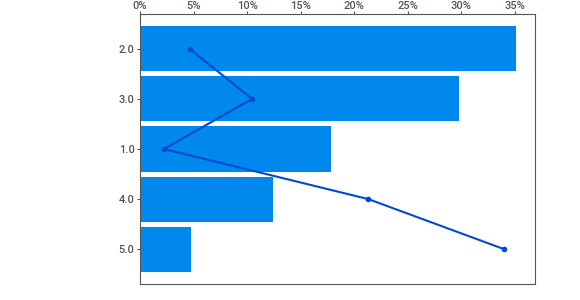
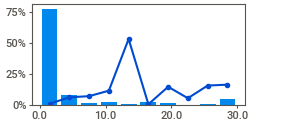
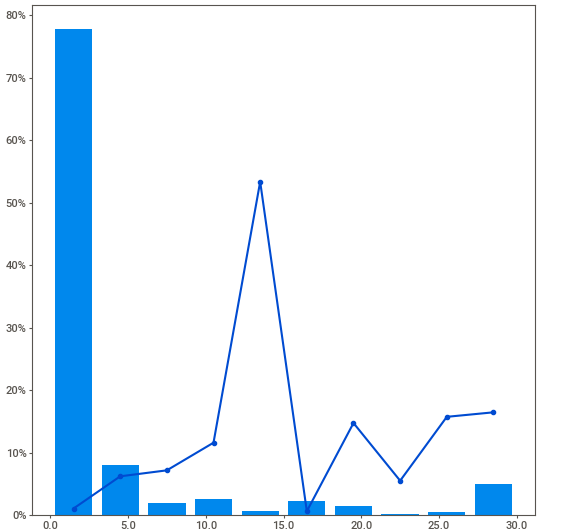
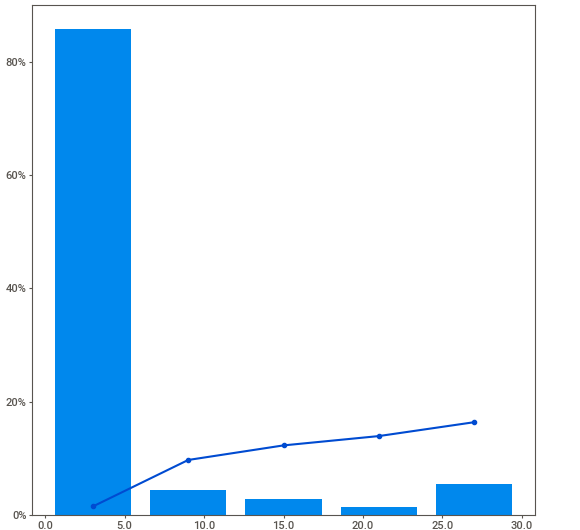
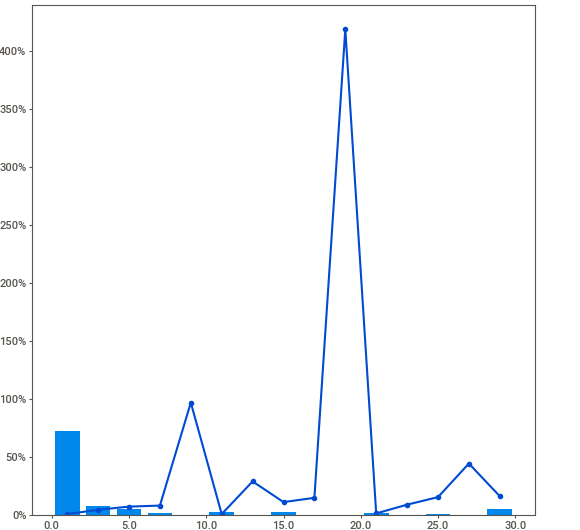
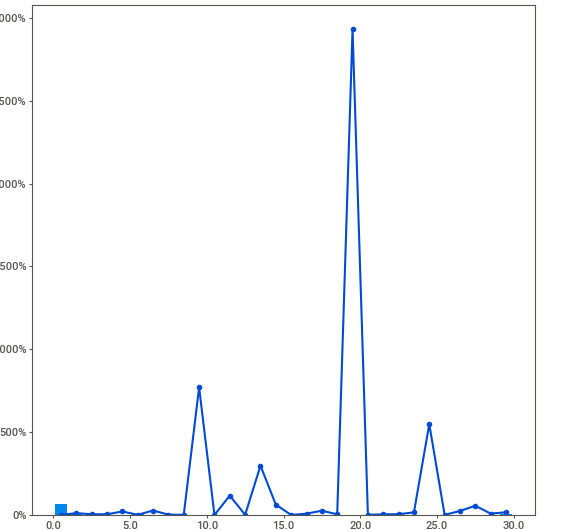
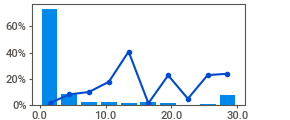
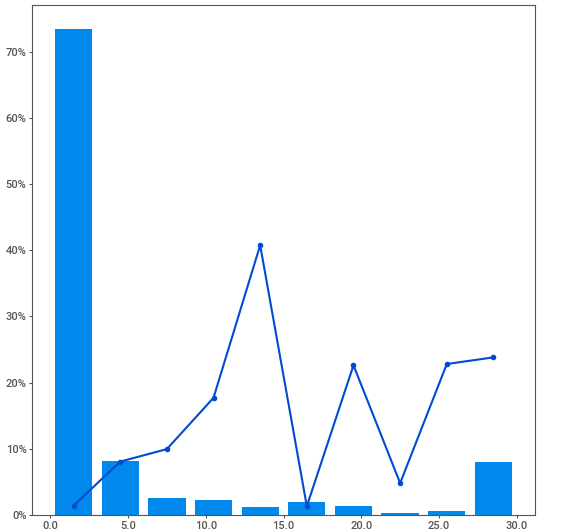
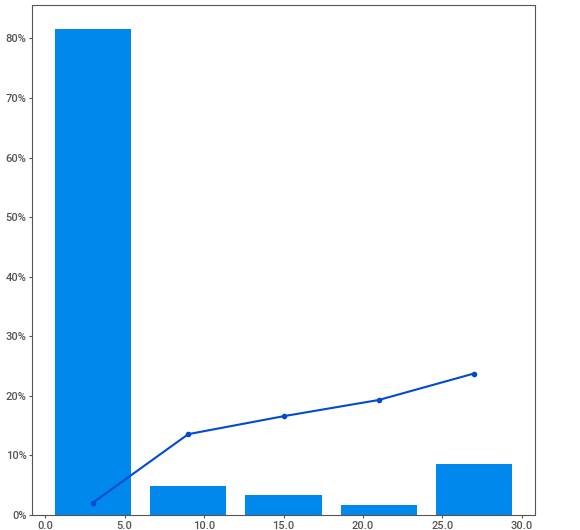
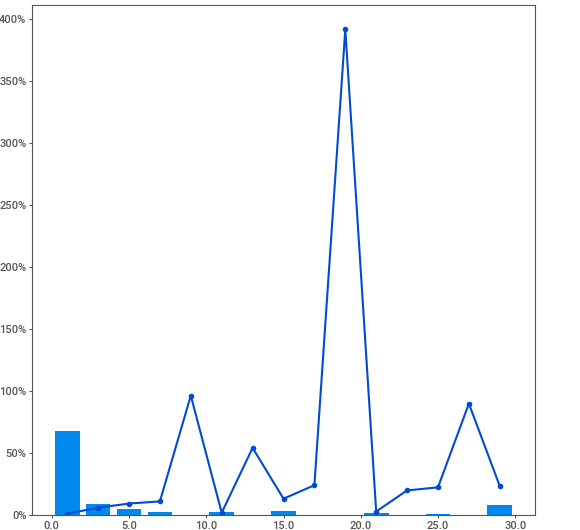
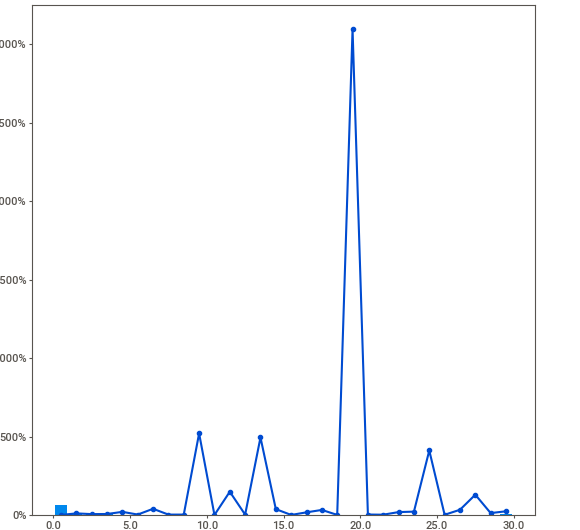
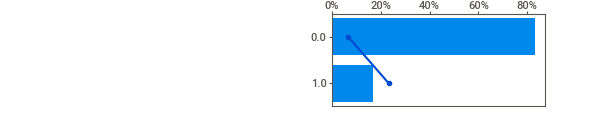
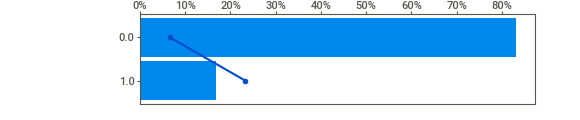
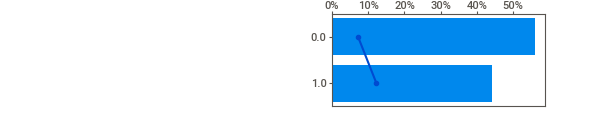
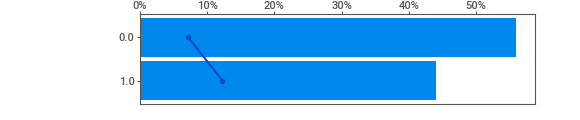
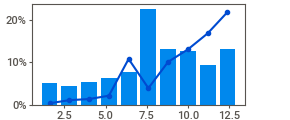
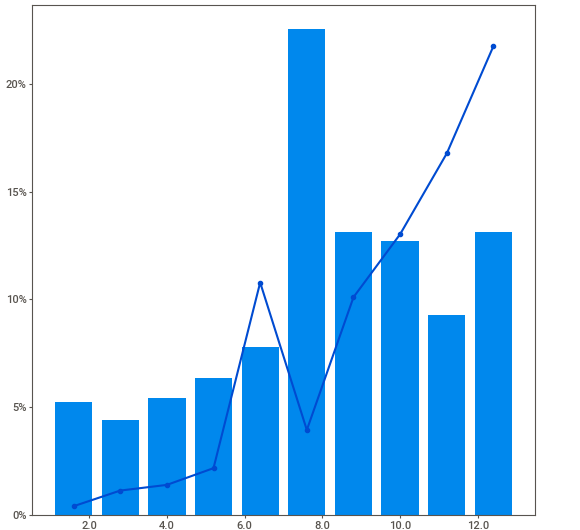
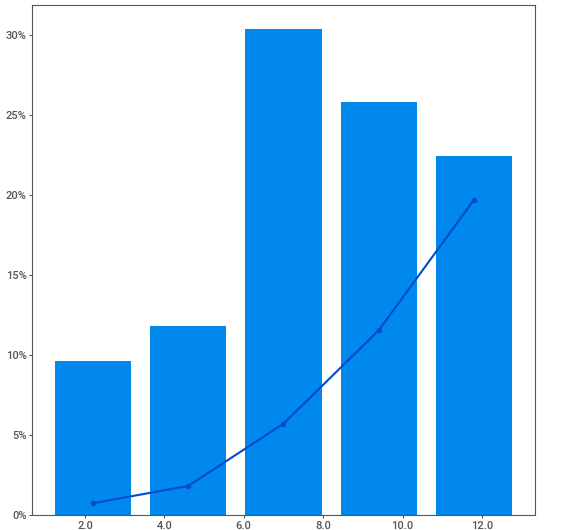
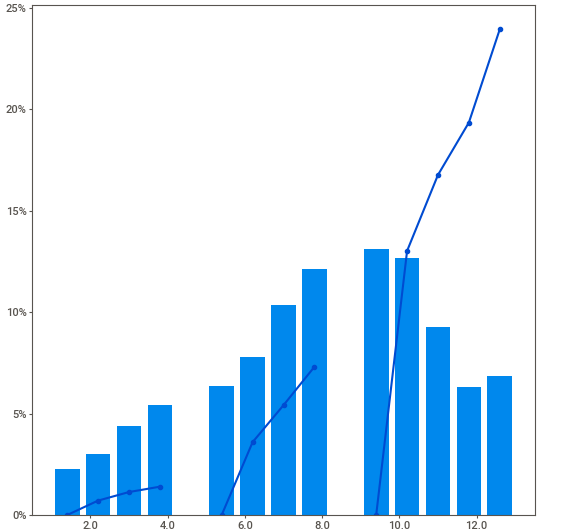
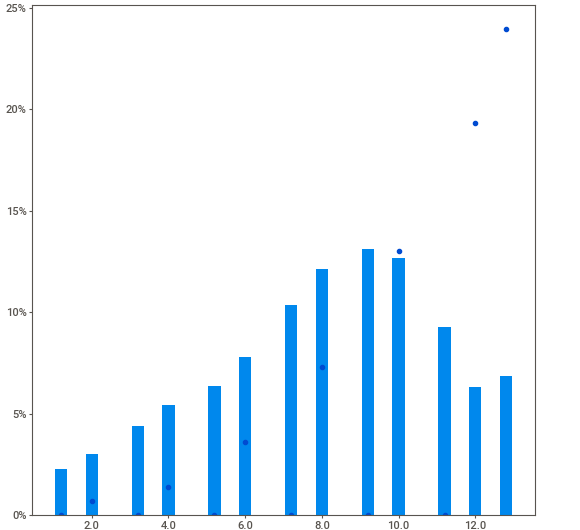
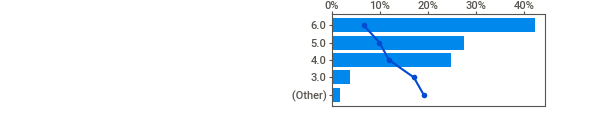
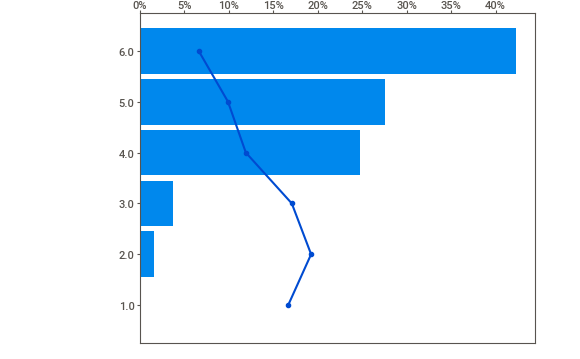
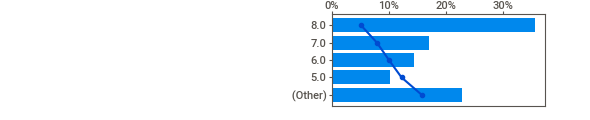
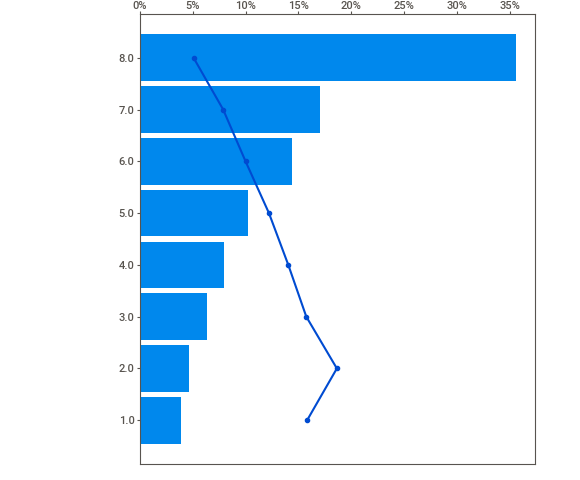
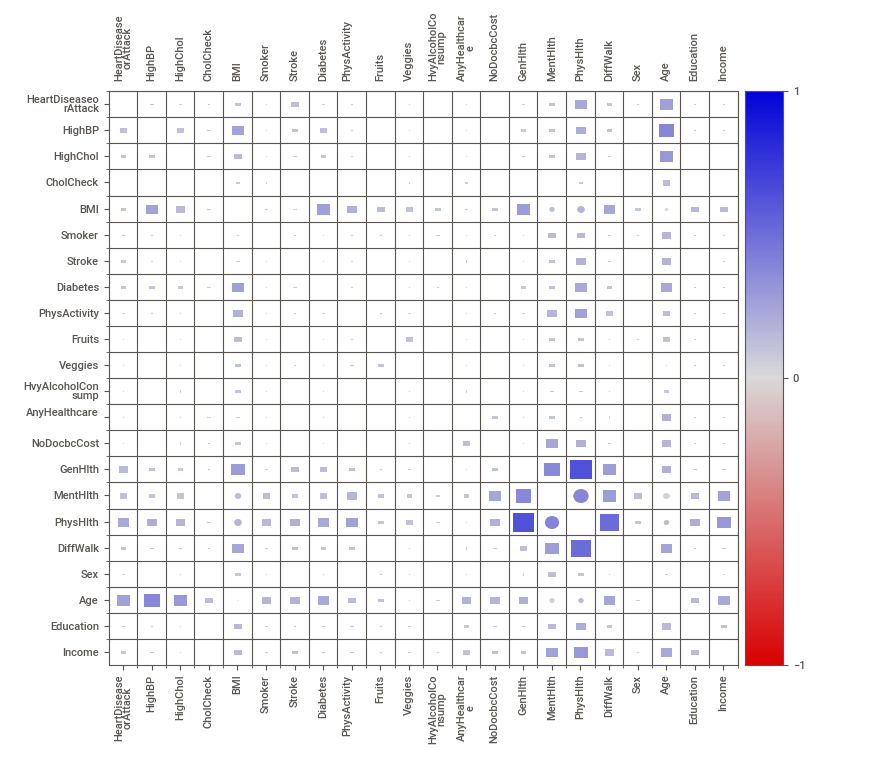
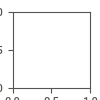

In [8]:
report = sweetviz.analyze([data, "HEART"], target_feat="HeartDiseaseorAttack")
report.show_notebook()

In [9]:
# напечатаем список столбцов
list_col = [col for col in data.columns]
print(list_col)

['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


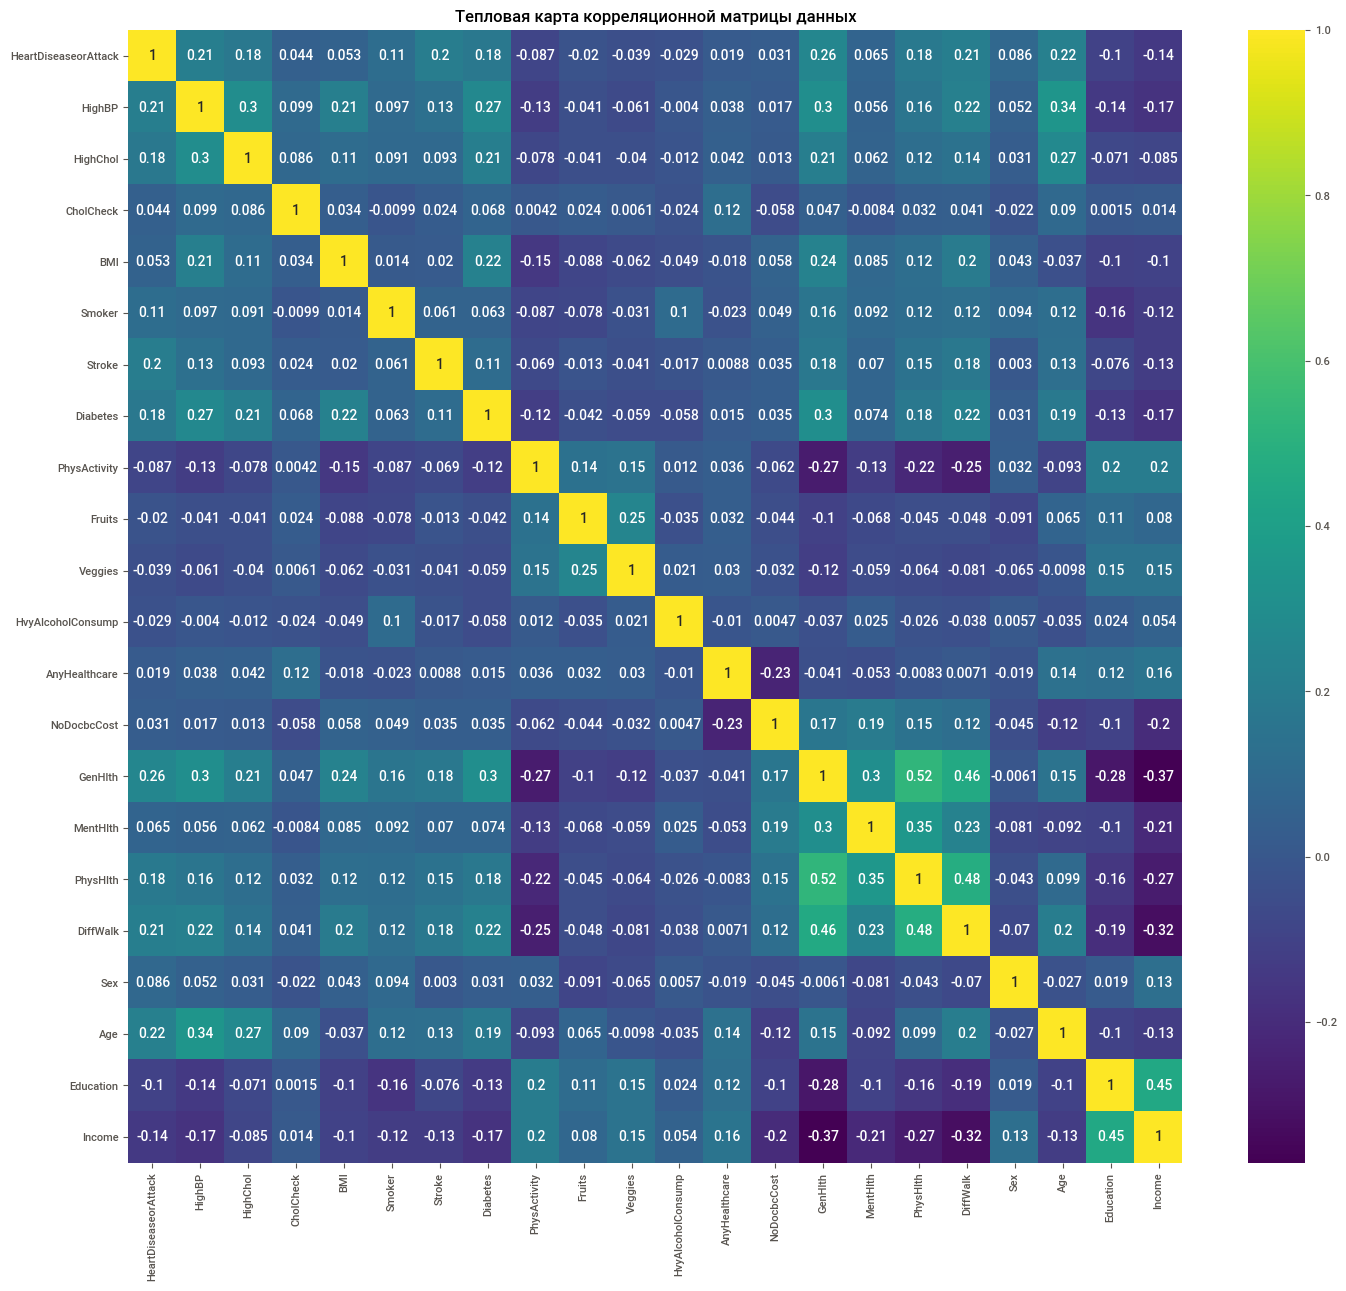

In [10]:
# строим тепловую карту корреляции признаков с целевой переменной 
f, ax = plt.subplots(figsize=(17,15))
cm = np.corrcoef(data[list_col].values.T)
sns.heatmap(cm,annot=True, ax=ax, cmap="viridis");
    
ax.set_xticklabels(list_col,rotation='vertical')   
ax.set_yticklabels(list_col,rotation='horizontal')
ax.set_title('Тепловая карта корреляционной матрицы данных');


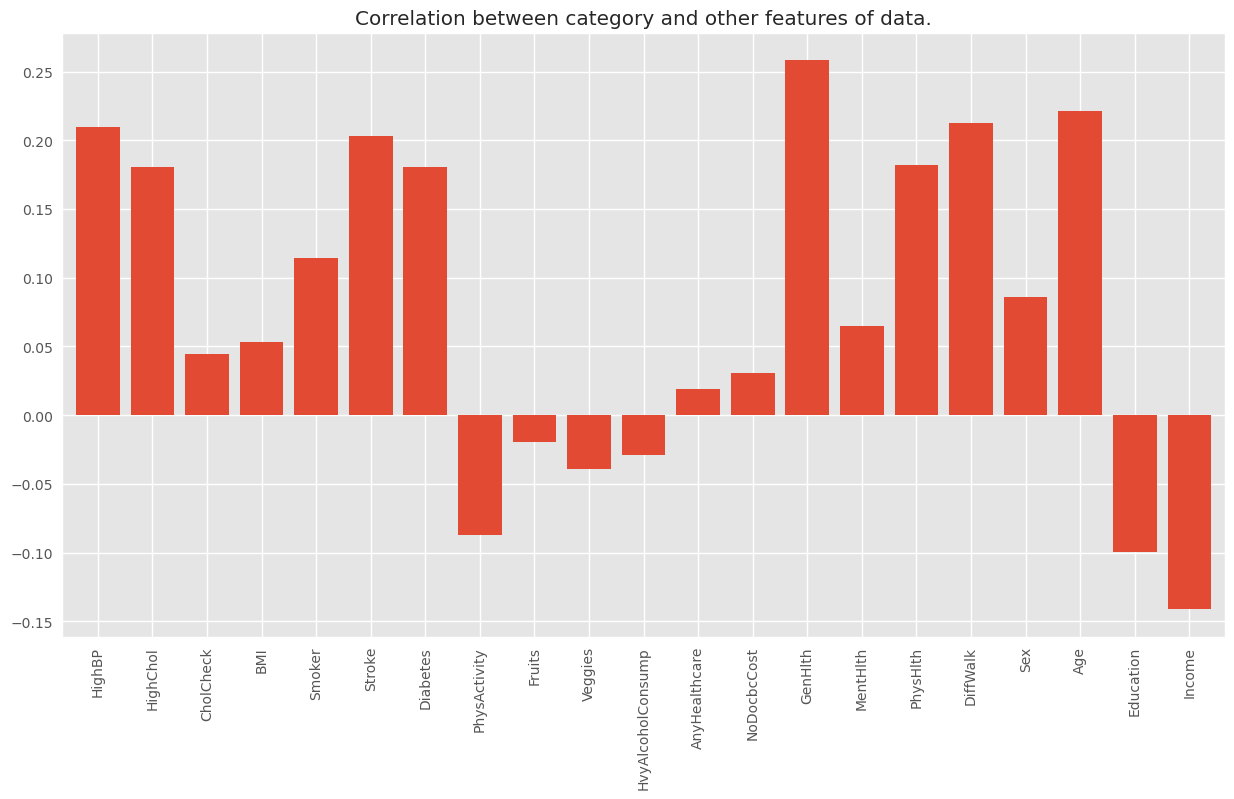

In [11]:
with plt.style.context(('seaborn', 'ggplot')):
    plt.figure(figsize=(15,8))
    data.corr()['HeartDiseaseorAttack'].drop('HeartDiseaseorAttack').plot(kind='bar', width=0.8,
                                                          title="Correlation between  features of data.")

In [12]:
features_train,features_test,target_train,target_test =train_test_split(features,target,test_size=0.25,
                                                                        random_state=5,stratify=target)
print(features_train.shape,target_train.shape)
print(features_test.shape,target_test.shape)

(190260, 21) (190260,)
(63420, 21) (63420,)


Wall time: 21.4 s


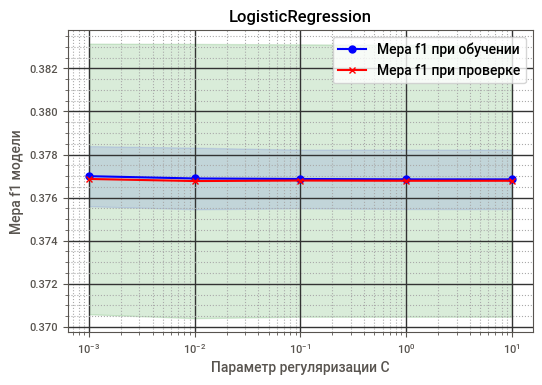

In [13]:
%%time
#            Строим кривую проверки для модели LogisticRegression
param_range=[0.001,0.01,0.1,1.0,10.0]# обратный параметр регуляризации
pipe_lr_val=make_pipeline(StandardScaler(),
                     LogisticRegression(penalty='l2',# l2 это регуляризация
                                       random_state=5,
                                       class_weight='balanced',
                                       max_iter=1000))
train_scores,test_scores=validation_curve(
                                         estimator=pipe_lr_val,
                                         X=features,y=target,
                                         param_name='logisticregression__C', 
                                         param_range=param_range,cv=3,scoring='f1')
    
train_mean=np.mean(train_scores,axis=1)# вычисление средней f1 
train_std=np.std(train_scores,axis=1) #это  сренеквадратичное отклонение средней f1 
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1) # .std это стандартное отклонение 

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='Мера f1 при обучении')
plt.fill_between(param_range,train_mean + train_std,
                             train_mean - train_std,
                            alpha=0.1,color='blue')
plt.plot(param_range,test_mean,color='red',linestyle='-',marker='x',markersize=5,\
         label='Мера f1 при проверке');
plt.fill_between(param_range,test_mean + test_std,
                             test_mean - test_std,
                            alpha=0.15,color='green');
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.xscale('log')
plt.title('LogisticRegression')
plt.xlabel('Параметр регуляризации С')
plt.ylabel('Мера f1 модели')
plt.legend(loc='best');

Видим,что мера f1 маленькая и по виду графика понятно что модель не подходит

Wall time: 1min 10s


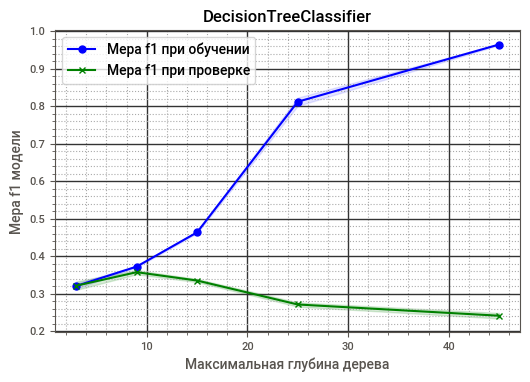

In [14]:
%%time
#         Строим кривую проверки модели DecisionTreeClassifier
param_range =[3,9,15,25,45]                                                 
train_scores,test_scores=validation_curve(
                                         estimator=DecisionTreeClassifier(class_weight='balanced'),
                                         X=features,y=target,
                                         param_name='max_depth',
                                         param_range=param_range,cv=5,scoring='f1')
    
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1) 
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)  

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='Мера f1 при обучении')
plt.fill_between(param_range,train_mean + train_std,
                             train_mean - train_std,
                            alpha=0.1,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='-',marker='x',markersize=5,\
                 label='Мера f1 при проверке')
plt.fill_between(param_range,test_mean + test_std,
                             test_mean - test_std,
                 
                            alpha=0.15,color='green')
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('DecisionTreeClassifier')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Мера f1 модели')
plt.legend(loc='best');                 

Модель не подходит для дальнейшего анализа - и мера маленькая и дисперсия все отменяет
Переходим к рассмртрению бустинговой модели.

Функция предсказания использует стандартный порог 0,5 для преобразования вероятностей предсказания в двоичное значение. Когда мы имеем дело с несбалансированностью классов, порог 0,5 не всегда является лучшим значением, поэтому на тестовом наборе можем получить низкую точность.

Чтобы найти лучший порог, у catboost есть несколько методов, которые помогут  в этом, например, get_roc_curve, get_fpr_curve, get_fnr_curve. Эти 3 метода могут помочь  визуализировать истинные положительные, ложноположительные и ложноотрицательные показатели, изменив порог предсказания.

Помимо этих методов визуализации, у catboost есть метод select_threshold, который дает вам лучший порог, оптимизируя одну из кривых.

ИСПЫТАНИЯ:
1. Уберем дисбаланс классов.
2. Найдем лучший порог.
3. Построим матрицу неточностей.

In [15]:
# посчитаем  веса классов 
classes = np.unique(target_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=target_train)
class_weights = dict(zip(classes, weights))
print(class_weights)

{0.0: 0.5519902518277823, 1.0: 5.30859375}


Перед тем, как подобрать гиперпараметры рассмотрим некоторые параметры обучения модели

In [16]:
# F1 с учетом весов класса и без учета
model1 = CatBoostClassifier(
    iterations=150,
    random_seed=63,
    learning_rate=0.1,
    eval_metric='F1',
    train_dir='class_weights=class_weights',
    class_weights=class_weights)

model1.fit(
    features_train, target_train,
    
    eval_set=(features_test, target_test),
    
    verbose=False,
    
    plot=True
)


model2 = CatBoostClassifier(
    iterations=150,
    random_seed=63,
    learning_rate=0.1, 
    eval_metric='F1',
    train_dir='class_weights = False',
    
)
model2.fit(
    features_train, target_train,
    
    eval_set=(features_test, target_test),
    
    verbose=False,
    
    plot=True
)

#MetricVisualizer(['class_weights=class_weights', 'class_weights=False']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Видим,учет весов классов необходим

In [17]:
#   посмотрим F1 в зависимости от шага обучения
model3 = CatBoostClassifier(
    learning_rate=0.5,
    iterations=100,
    eval_metric='AUC',
    random_seed=63,
    class_weights=class_weights,
    train_dir='learing_rate_0.01',
)

model4 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=100,
    eval_metric='AUC',
    random_seed=63,
    class_weights=class_weights,
    train_dir='learing_rate_0.5',
)
model3.fit(
    features_train, target_train,
    eval_set=(features_test, target_test),

    verbose=False
)
model4.fit(
    features_train, target_train,
    eval_set=(features_test, target_test),
    
    verbose=False
)

MetricVisualizer(['learing_rate_0.01', 'learing_rate_0.5']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Для малых шагов обучения необходимо меньшее число оценщиков

In [18]:
#   посмотрим F1 в зависимости от количества оценщиков
model5 = CatBoostClassifier(
    learning_rate=0.5,
    iterations=100,
    random_seed=63,
    eval_metric='AUC',
    class_weights=class_weights,
    train_dir='iterations_100',
)

model6 = CatBoostClassifier(
    learning_rate=0.5,
    iterations=150,
    random_seed=63,
    eval_metric='AUC',
    class_weights=class_weights,
    train_dir='iterations_150',
)
model5.fit(
    features_train, target_train,
    eval_set=(features_test, target_test),
    plot=True,
    verbose=False
)
model6.fit(
    features_train, target_train,
    eval_set=(features_test, target_test),
    plot=True,
    verbose=False
)

#MetricVisualizer(['iterations_100', 'iterations_150']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Подберем гиперпараметры модели

In [19]:
booster = CatBoostClassifier()

params = {
            'iterations':[15,35,45],
            'learning_rate':[0.01,0.3,0.5],
            'bootstrap_type':['Bayesian','Bernoulli', 'No']
}

search_results = booster.grid_search(params, features_train, target_train, cv=3)

print("\nBest Params : ", search_results['params'])

0:	learn: 0.6800748	test: 0.6800597	best: 0.6800597 (0)	total: 68.8ms	remaining: 963ms
1:	learn: 0.6673218	test: 0.6673261	best: 0.6673261 (1)	total: 120ms	remaining: 781ms
2:	learn: 0.6559112	test: 0.6559085	best: 0.6559085 (2)	total: 177ms	remaining: 708ms
3:	learn: 0.6448532	test: 0.6448147	best: 0.6448147 (3)	total: 230ms	remaining: 633ms
4:	learn: 0.6331122	test: 0.6330281	best: 0.6330281 (4)	total: 314ms	remaining: 629ms
5:	learn: 0.6217968	test: 0.6216871	best: 0.6216871 (5)	total: 371ms	remaining: 556ms
6:	learn: 0.6111124	test: 0.6109727	best: 0.6109727 (6)	total: 427ms	remaining: 487ms
7:	learn: 0.6008228	test: 0.6006669	best: 0.6006669 (7)	total: 480ms	remaining: 420ms
8:	learn: 0.5905285	test: 0.5903269	best: 0.5903269 (8)	total: 563ms	remaining: 376ms
9:	learn: 0.5816081	test: 0.5813556	best: 0.5813556 (9)	total: 628ms	remaining: 314ms
10:	learn: 0.5715560	test: 0.5712637	best: 0.5712637 (10)	total: 684ms	remaining: 249ms
11:	learn: 0.5624407	test: 0.5621420	best: 0.562142

In [20]:
booster = CatBoostClassifier(**search_results['params'],class_weights=class_weights,eval_metric='AUC')
booster.fit(features_train, target_train,
           
          # eval_set=(features_test, target_test),
           # use_best_model=True,# выбрали лучшую модель 
            verbose=False,
            plot=True,
           
           );

booster.set_feature_names(features_train.columns.tolist()) 


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [21]:
test_preds = booster.predict(features_test)
train_preds = booster.predict(features_train)

print("\nTest  Accuracy : %.2f"%booster.score(features_test, target_test))
print("Train Accuracy : %.2f"%booster.score(features_train, target_train))
print('Метрика f1=', f1_score(y_true=target_test,y_pred=test_preds))
print(classification_report(target_test,test_preds ))
print("\nЛучшие выбранные параметры : ", search_results['params'])

print("Параметры заданные при создании модели : ",booster.get_params())
print("\nВсе возможные параметры этой модели : ",booster.get_all_params())


Test  Accuracy : 0.74
Train Accuracy : 0.74
Метрика f1= 0.3696555932720546
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.84     57447
         1.0       0.24      0.81      0.37      5973

    accuracy                           0.74     63420
   macro avg       0.61      0.77      0.60     63420
weighted avg       0.90      0.74      0.79     63420


Лучшие выбранные параметры :  {'iterations': 35, 'learning_rate': 0.3, 'bootstrap_type': 'Bernoulli'}
Параметры заданные при создании модели :  {'iterations': 35, 'learning_rate': 0.3, 'class_weights': {0.0: 0.5519902518277823, 1.0: 5.30859375}, 'eval_metric': 'AUC', 'bootstrap_type': 'Bernoulli'}

Все возможные параметры этой модели :  {'nan_mode': 'Min', 'eval_metric': 'AUC', 'iterations': 35, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_

In [22]:
print(booster.evals_result_)# возвращает словарь оценки

{'learn': {'Logloss': [0.5985433664555462, 0.5411940065836718, 0.5149881816159543, 0.5024620459669853, 0.49286027544607663, 0.4869793979155089, 0.48306950686923217, 0.4799203719036303, 0.47806095858482023, 0.4766375098973192, 0.4757347617715291, 0.475027486930442, 0.4742549326933767, 0.47367094036748897, 0.4733457217317899, 0.47295530832406646, 0.4725234216725485, 0.47215819109909424, 0.47173047733337903, 0.47148151679579653, 0.47119200251477783, 0.47098019577749733, 0.4706001734327836, 0.47026264039670845, 0.4700116570580872, 0.4696848287589394, 0.46950256249195377, 0.46926964024987483, 0.46906051343855976, 0.46890992619047256, 0.4686549265731276, 0.46843678029688957, 0.46829352945471464, 0.46813891433158633, 0.4679558281873103]}}


In [23]:
print("\nNumber of Features      : ",booster.n_features_in_)


Number of Features      :  21


In [24]:
print("\nNumber of Trees         : ",booster.tree_count_)


Number of Trees         :  35


In [25]:
print("\nBest Score                  : ",booster.get_best_score())


Best Score                  :  {'learn': {'Logloss': 0.4679558281873103}}


In [26]:
booster.predict(features_test, prediction_type="Probability")[:5]

array([[0.69602419, 0.30397581],
       [0.26825716, 0.73174284],
       [0.82768053, 0.17231947],
       [0.32717127, 0.67282873],
       [0.90610763, 0.09389237]])

In [27]:
catboost.to_classifier(booster)

In [28]:
booster.predict_proba(features_test)[:5]

array([[0.69602419, 0.30397581],
       [0.26825716, 0.73174284],
       [0.82768053, 0.17231947],
       [0.32717127, 0.67282873],
       [0.90610763, 0.09389237]])

Cross-validation

In [29]:

data = Pool(features, target)

cv(data, params={'iterations':75, 'loss_function':'CrossEntropy'}, nfold=5, plot=True, verbose=False);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2406477214
bestIteration = 74

Training on fold [1/5]

bestTest = 0.2427750426
bestIteration = 74

Training on fold [2/5]

bestTest = 0.2423330656
bestIteration = 74

Training on fold [3/5]

bestTest = 0.2430972748
bestIteration = 74

Training on fold [4/5]

bestTest = 0.239745356
bestIteration = 74



In [30]:


params = {}

params['loss_function'] = 'Logloss'
params['iterations'] = 50
params['eval_metric'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.3

cv_data = cv(
    params = params,
    pool = Pool(features, label=target),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8550025028
bestIteration = 31

Training on fold [1/5]

bestTest = 0.842852737
bestIteration = 48

Training on fold [2/5]

bestTest = 0.850747226
bestIteration = 34

Training on fold [3/5]

bestTest = 0.8518080928
bestIteration = 45

Training on fold [4/5]

bestTest = 0.8489466179
bestIteration = 26



Видим,что достаточно и cv=3 для получения достаточно маленького значения функции потерь при количестве деревьев 45.

In [31]:
cv_data.head()

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.794615,0.006745,0.415235,0.004979,0.414863,0.004723
1,1,0.832425,0.004262,0.311971,0.003333,0.311696,0.002667
2,2,0.840482,0.004814,0.271932,0.003090,0.271649,0.002830
3,3,0.842159,0.004847,0.255220,0.001425,0.254978,0.001381
4,4,0.843633,0.005094,0.247383,0.001706,0.247056,0.001550


In [32]:
best_value = np.max(cv_data['test-AUC-mean'])
best_iter = np.argmax(cv_data['test-AUC-mean'])

print('Лучшее тестовое значение AUC без стратификации и учета весов классов : {:.4f}±{:.4f} при  {} деревьях'.format(
    best_value,
    cv_data['test-AUC-std'][best_iter],
    best_iter)
)

Лучшее тестовое значение AUC без стратификации и учета весов классов : 0.8498±0.0045 при  48 деревьях


In [33]:
cv_data = cv(
    params = params,
    pool = Pool(features, label=target,),
    fold_count=5,
    type = 'Classical',
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

best_value = np.max(cv_data['test-AUC-mean'])
best_iter = np.argmax(cv_data['test-AUC-mean'])

print('Лучшее тестовое значение AUC со стратификацией : {:.4f}±{:.4f} при {} деревьях'.format(
    best_value,
    cv_data['test-AUC-std'][best_iter],
    best_iter)
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8555581777
bestIteration = 36

Training on fold [1/5]

bestTest = 0.8425535206
bestIteration = 47

Training on fold [2/5]

bestTest = 0.8509349672
bestIteration = 47

Training on fold [3/5]

bestTest = 0.8527095751
bestIteration = 43

Training on fold [4/5]

bestTest = 0.8488937891
bestIteration = 38

Лучшее тестовое значение AUC со стратификацией : 0.8501±0.0048 при 47 деревьях


Стратификация увеличила значение AUC cовсем не значительно для наших данных. 

In [34]:
cv_data.head()

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.796899,0.007518,0.413853,0.003869,0.413521,0.003947
1,1,0.830789,0.003683,0.311073,0.003543,0.310807,0.003657
2,2,0.839077,0.006399,0.271671,0.002686,0.271453,0.001990
3,3,0.841071,0.005199,0.256063,0.002022,0.255779,0.001741
4,4,0.843398,0.004931,0.247544,0.001379,0.247189,0.000917


Визуализация результата испытаний

In [35]:
model = CatBoostClassifier(**search_results['params'],class_weights=class_weights,eval_metric='AUC')
model.fit(features_train, target_train,
           eval_set=(features_test, target_test),verbose=False,
            );
model.set_feature_names(features_train.columns.tolist()) 


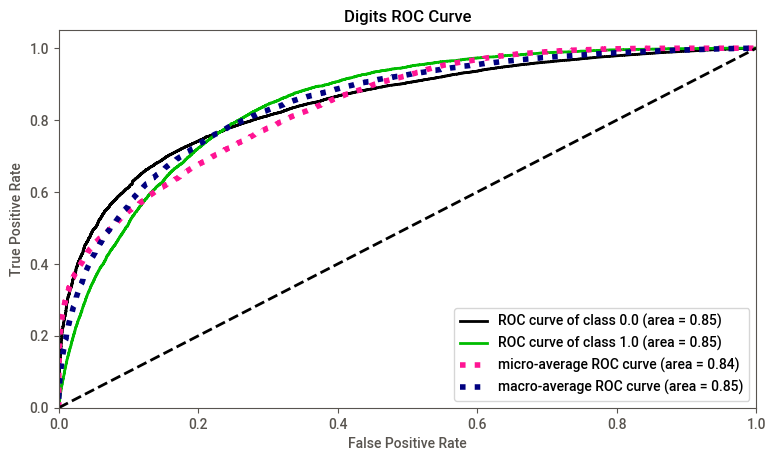

In [36]:
#   ROC кривая sklearn
lr_probs = model.predict_proba(features_test)
skplt.metrics.plot_roc_curve(target_test, lr_probs,
                       title="Digits ROC Curve", figsize=(9,5));

ROC AUC имеет достаточно большое и равное значение для двух классов (здесь мы сделали балансировку классов) - это хороший результат

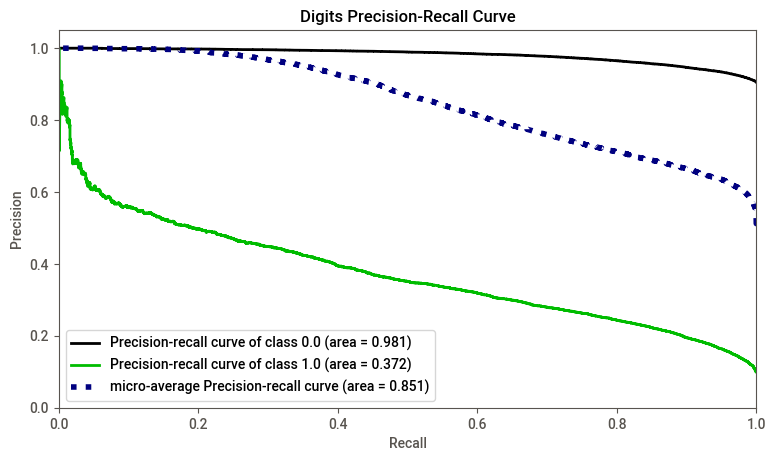

In [37]:
skplt.metrics.plot_precision_recall_curve(target_test, lr_probs,
                       title="Digits Precision-Recall Curve", figsize=(9,5));

Кривая точности отзыва, которая имеет почти такое же использование, как и кривая ROC AUC. Кривая ROC AUC и кривая точности отзыва полезны при наличии несбалансированного набора данных.

Мы подали исходные целевые значения, а также предсказанные вероятности этих целевых значений нашей моделью, чтобы построить кривую точности отзыва.

Из приведенного выше графика мы видим, что площадь, покрытая линией кривой точности отзыва класса 0, составляет более 98%, что хорошо,но для класса 1 (меньшего по размеру) эта площадь всего 0.37,т.е. классы нашей моделью отрабатываются не равномерно и это плохо. ВАЖНО, чтобы линия каждого класса охватывала более 90% площади, чтобы мы могли быть уверены, что наша модель хорошо предсказывает каждый класс даже в ситуации несбалансированного набора данных.

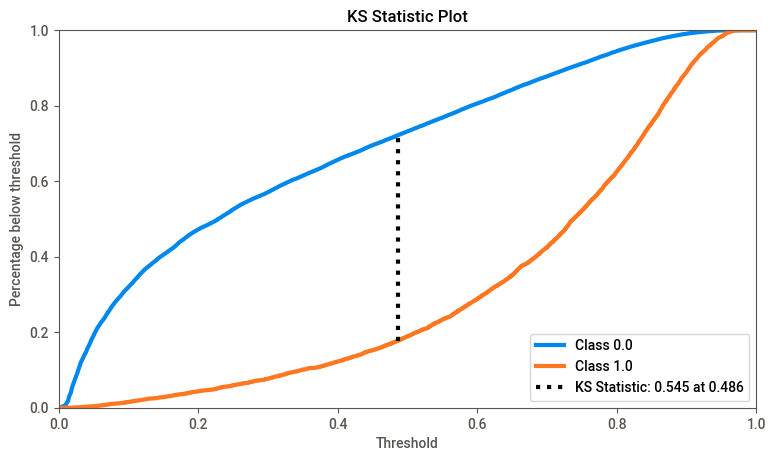

In [38]:
predict_probas = booster.predict_proba(features_test)
skplt.metrics.plot_ks_statistic(target_test, predict_probas, figsize=(9,5));

Статистика КС (статистика Колмогорова-Смирнова) представляет собой максимальную разницу между кумулятивной истинно-положительной и кумулятивной ложноположительной скоростью. Он отражает способность модели отличать положительные классы от отрицательных. 
В нашем случае эта разница составляет долю в 47% что не очень хорошо.

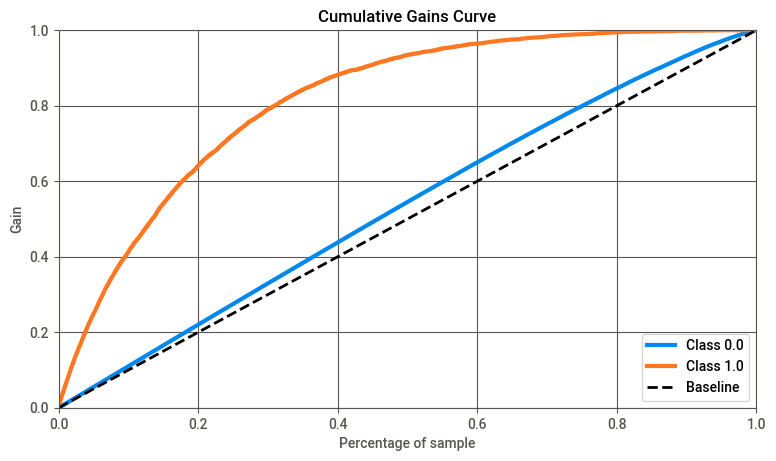

In [39]:
skplt.metrics.plot_cumulative_gain(target_test, predict_probas, figsize=(9,5));

Диаграмма кумулятивного прироста говорит нам о проценте выборок в данной категории, которые были действительно предсказаны путем таргетинга на процент от общего числа выборок. Это означает, что когда мы взяли, что многие проценты выборок из общего процента, который мы получаем от кривой для оси Y, являются метками, которые действительно были угаданы моделью из общего числа образцов этого класса в таком количестве выборок. Пунктирная линия на графике является базовой кривой (модель случайного угадывания), и наша модель должна работать лучше,  обе кривые класса  выше нее .

Видим,что для класса 1 процент прогнозирования меток от общего количества меток данного класса выше,чем для класса 0 - тоже не хорошо.

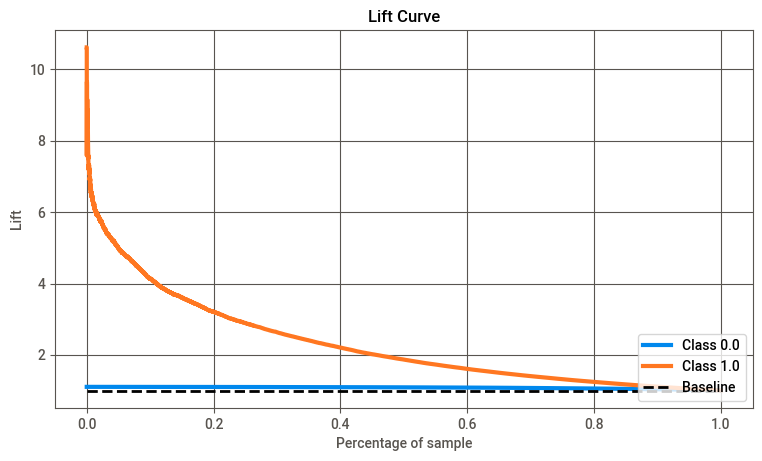

In [40]:
skplt.metrics.plot_lift_curve(target_test, predict_probas, figsize=(9,5));

Диаграмма точности прогнозов выводится из кумулятивной диаграммы путем взятия отношения кумулятивного прироста для каждой кривой к базовому уровню и отображения этого соотношения на оси Y.

Видим существеннй процент не достаточного прогнозирования меток в классе 1 и только доля с 15% и менее (1- 0.85)предсказывается точно. 

In [42]:


glassbox_boosting = glassbox.ExplainableBoostingClassifier(feature_names=features.columns)
glassbox_boosting

glassbox_boosting.fit(features_train, target_train)

print("Train Accuracy : %.2f"%glassbox_boosting.score(features_train, target_train))
print("Test  Accuracy : %.2f"%glassbox_boosting.score(features_test, target_test))

boosting_global_explanation = glassbox_boosting.explain_global(name="heart_disease_health_indicators_BRFSS2015")
boosting_local_explanation = glassbox_boosting.explain_local(features_test, target_test,
                                                 name="heart_disease_health_indicators_BRFSS2015")

Train Accuracy : 0.91
Test  Accuracy : 0.91


In [43]:
show(boosting_global_explanation)
show(boosting_local_explanation)

<!-- http://127.0.0.1:7001/3035251307664/ -->

<!-- http://127.0.0.1:7001/3035251307856/ -->

In [44]:
#from interpret import perf

In [45]:
precicion_recall = perf.PR(glassbox_boosting.predict_proba, feature_names=features.columns)
precicion_recall

In [46]:
pr_explanation = precicion_recall.explain_perf(features_test,target_test)
pr_explanation

In [47]:
show(pr_explanation)

<!-- http://127.0.0.1:7001/3035251309968/ -->

In [48]:
roc = perf.ROC(glassbox_boosting.predict_proba, feature_names=features.columns)

In [49]:
roc_explanation = roc.explain_perf(features_test,target_test)
roc_explanation

In [50]:
show(roc_explanation)

<!-- http://127.0.0.1:7001/3035251309392/ -->

Рассмотрим модель XGBoost

In [52]:
xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(features_train, target_train,
            #eval_set=[(features_test, target_test)],
            eval_metric="auc" , 
            verbose=False
           )

print("Accuracy на тестовой : %.2f"%xgb_clf.score(features_test, target_test))
print("Accuracy на обучающей : %.2f"%xgb_clf.score(features_train, target_train))

Accuracy на тестовой : 0.91
Accuracy на обучающей : 0.92


In [53]:
#  посмотрим на полученные предсказанием метки
xgb_clf.predict(features_test)[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
print("\nВЕРОЯТНОСТИ ПРЕДСКАЗАНИЯ МЕТОК : ")
print(xgb_clf.predict_proba(features_test)[:15])
print("\nПРЕДСКАЗАНИЯ ПО ВЕРОЯТНОСТЯМ : ")
print(np.argmax(xgb_clf.predict_proba(features_test)[:15], axis=1))


ВЕРОЯТНОСТИ ПРЕДСКАЗАНИЯ МЕТОК : 
[[0.943153   0.056847  ]
 [0.8150353  0.18496473]
 [0.98633105 0.01366895]
 [0.8314091  0.16859089]
 [0.98846173 0.01153824]
 [0.9080364  0.09196359]
 [0.5542438  0.44575623]
 [0.811334   0.18866597]
 [0.6470727  0.35292733]
 [0.972404   0.02759601]
 [0.5477365  0.45226347]
 [0.93435806 0.06564194]
 [0.76822287 0.23177713]
 [0.9499624  0.0500376 ]
 [0.67586684 0.32413313]]

ПРЕДСКАЗАНИЯ ПО ВЕРОЯТНОСТЯМ : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [55]:
print("ДЕРЕВЬЕВ ПО УМОЛЧАНИЮ : ",xgb_clf.n_estimators)
print("ДЕФОЛТНАЯ ГЛУБИНА ДЕРЕВА    : ", xgb_clf.max_depth)
print("ВАЖНЫЕ ПРИЗНАКИ МОДЕЛИ : ",xgb_clf.feature_importances_ )
pd.DataFrame([xgb_clf.feature_importances_], columns=features.columns)

ДЕРЕВЬЕВ ПО УМОЛЧАНИЮ :  100
ДЕФОЛТНАЯ ГЛУБИНА ДЕРЕВА    :  None
ВАЖНЫЕ ПРИЗНАКИ МОДЕЛИ :  [0.2233787  0.06760127 0.0212     0.01036741 0.0331527  0.10029534
 0.02735177 0.01069439 0.0113347  0.01053066 0.019542   0.00982404
 0.01524473 0.16934018 0.01114721 0.01258527 0.05389496 0.07321226
 0.09384093 0.01118148 0.01428002]


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.223379,0.067601,0.0212,0.010367,0.033153,0.100295,0.027352,0.010694,0.011335,0.010531,...,0.009824,0.015245,0.16934,0.011147,0.012585,0.053895,0.073212,0.093841,0.011181,0.01428


In [56]:
%%time
clf = xgb.XGBClassifier()
params = {
        'n_estimators': [25,35,45],
        'max_depth': [None,1,3],
        'eta': [0.001,0.01,0.5]
    
}
        
grid_search = GridSearchCV(clf, params, n_jobs=1, cv=3)

grid_search.fit(features_train, target_train)

print("Test  Accuracy Score : %.2f"%grid_search.score(features_test, target_test))
print("Train Accuracy Score : %.2f"%grid_search.score(features_train, target_train))

print("Best Params : ", grid_search.best_params_)
print("Feature Importances :", grid_search.best_estimator_.feature_importances_)
pd.DataFrame([grid_search.best_estimator_.feature_importances_], columns=features.columns)

Test  Accuracy Score : 0.91
Train Accuracy Score : 0.91
Best Params :  {'eta': 0.5, 'max_depth': 3, 'n_estimators': 45}
Feature Importances : [0.23438779 0.11343637 0.00806511 0.0022537  0.03530988 0.09236734
 0.0379024  0.00274556 0.00275182 0.00482026 0.00954961 0.000673
 0.00889533 0.1184859  0.00274486 0.00492386 0.1367188  0.06640749
 0.10620958 0.00277406 0.00857722]
Wall time: 4min 51s


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.234388,0.113436,0.008065,0.002254,0.03531,0.092367,0.037902,0.002746,0.002752,0.00482,...,0.000673,0.008895,0.118486,0.002745,0.004924,0.136719,0.066407,0.10621,0.002774,0.008577


In [57]:
clf = xgb.XGBClassifier(**grid_search.best_params_,scale_pos_weight=10)

In [58]:
clf.fit(features_train, target_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.5,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=45, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [59]:
print("Accuracy на тестовой : %.2f"%clf.score(features_test, target_test))
print("Accuracy на обучающей : %.2f"%clf.score(features_train, target_train))

Accuracy на тестовой : 0.73
Accuracy на обучающей : 0.73


In [60]:
pred_test = clf.predict(features_test)
pred_train = clf.predict(features_train)

In [61]:
print('Метрика  f1 на тестовой', f1_score(y_true=target_test,y_pred=pred_test))
print('Метрика f1 на обучающей', f1_score(y_true=target_train,y_pred=pred_train))
print(classification_report(target_test,pred_test ))

Метрика  f1 на тестовой 0.36484606999210617
Метрика f1 на обучающей 0.3695909936221465
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     57447
         1.0       0.24      0.81      0.36      5973

    accuracy                           0.73     63420
   macro avg       0.60      0.77      0.60     63420
weighted avg       0.90      0.73      0.79     63420



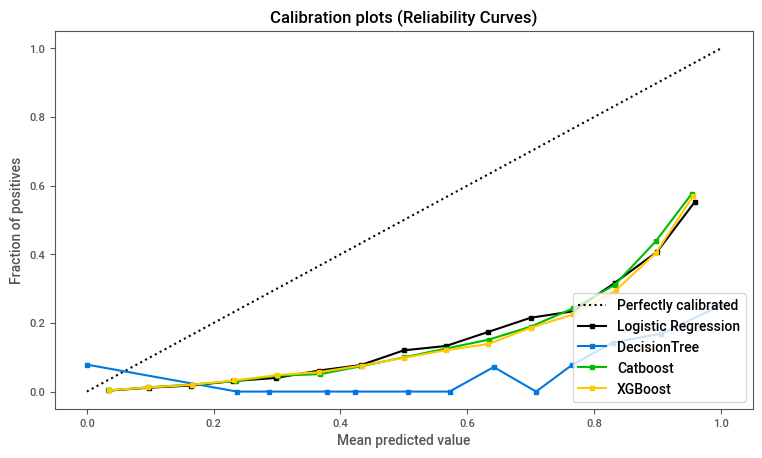

In [62]:
lr_probas = pipe_lr_val.fit(features_train, target_train).predict_proba(features_test)
dt_probas = DecisionTreeClassifier(class_weight='balanced').fit(features_train, target_train).predict_proba(features_test)
cbc_probas= model.fit(features_train, target_train,verbose=False).predict_proba(features_test)
xgb_probas= clf.fit(features_train, target_train,verbose=False).predict_proba(features_test)
probas_list = [lr_probas, dt_probas,cbc_probas,xgb_probas]
clf_names = ['Logistic Regression', 'DecisionTree','Catboost','XGBoost']
skplt.metrics.plot_calibration_curve(target_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(9,5)
                                     );

Калибровочная кривая, также известная как кривые надежности.

Калибровочная кривая подходит для сравнения производительности различных моделей, а также для понимания того, какое пороговое значение для определения метки класса приводит к переобучению или не дообучению модели. Нам нужна модель, где точки в основном находятся вблизи пунктирной линии.



In [63]:
model.get_feature_importance(prettified=True).head(9)

,Feature Id,Importances
0,Age,27.448898
1,GenHlth,19.761469
2,Sex,9.687794
3,HighBP,8.407940
4,HighChol,7.948374
5,Stroke,6.915108
6,Income,3.799332
7,Smoker,3.092916
8,DiffWalk,2.736715


In [64]:
pd.DataFrame([clf.feature_importances_], columns=features.columns)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.35381,0.078665,0.008237,0.002239,0.056343,0.071664,0.042276,0.001488,0.003361,0.001973,...,0.002029,0.004988,0.095521,0.002897,0.004401,0.093051,0.064724,0.088254,0.00164,0.015637


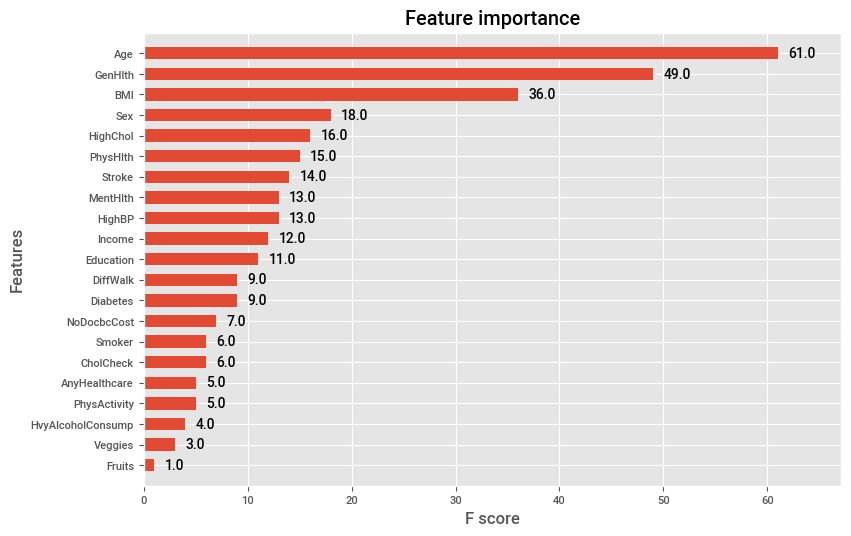

In [65]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(111)
    xgb.plotting.plot_importance(clf, ax=ax, height=0.6, importance_type="weight")

Матрица ошибок Catboost [[42047. 15400.]
 [ 1127.  4846.]]


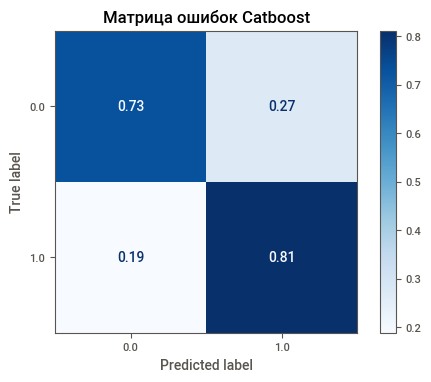

In [66]:
cm = get_confusion_matrix(model, Pool(features_test, target_test))
print('Матрица ошибок Catboost',cm)
#cm = confusion_matrix(target_test,test_preds)
#print('Матрица ошибок Catboost',cm)



plot_confusion_matrix(estimator=model, X=features_test, y_true=target_test,\
                   normalize='true',cmap='Blues');
plt.title('Матрица ошибок Catboost');

Матрица ошибок XGBoost [[41670 15777]
 [ 1120  4853]]


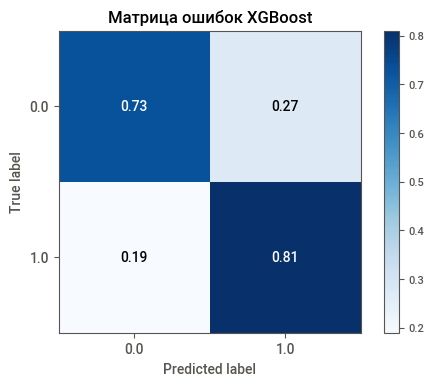

In [67]:
cl = confusion_matrix(target_test,pred_test)
print('Матрица ошибок XGBoost',cl)
skplt.metrics.plot_confusion_matrix(target_test, pred_test,
                                    normalize=True,
                                    title="Матрица ошибок XGBoost",
                                    cmap="Blues");
                                    

Рассмотрм матрицу неточностей моделей Catboost и XGBoost
Видим долю в 0.81 меток класса 1 определенных как TP (recall) также долю в 0.73 меток отрицательного класса 0 определенных как TN. 
Доля положительных меток,но определенных как ложноотрицательных (FN) составляет 0.27,и доля отрицательных меток,но определенных как ложноположительные (FP) составляет 0.19.

ОБЩИЙ ВЫВОД ПРОЕКТА
Главными факторами вызывающими сердечные приступы являются возраст,генетические особенности,пол,высокие холестерин и кровяное давление,перенесенный инсульт,доход(стрессы и переедание???),курение.